<a href="https://colab.research.google.com/github/pedrohenrique-engcomp/Database_credit-card/blob/main/Entregavel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Abertura do Arquivo**


In [ ]:
dir = "/content/drive/MyDrive/Colab"

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
dir = "/content/drive/MyDrive/Colab/creditcard.csv"

# **Leitura do Dataset**

In [ ]:
df = pd.read_csv(dir)

In [ ]:
df

Time          CPF         V1         V2        V3        V4  \
0            0.0  54813014251  -1.359807  -0.072781  2.536347  1.378155   
1            0.0  30103185035   1.191857   0.266151  0.166480  0.448154   
2            1.0  90496200132  -1.358354  -1.340163  1.773209  0.379780   
3            1.0  00730861854  -0.966272  -0.185226  1.792993 -0.863291   
4            2.0  38879097489  -1.158233   0.877737  1.548718  0.403034   
...          ...          ...        ...        ...       ...       ...   
284802  172786.0  30270786463 -11.881118  10.071785 -9.834783 -2.066656   
284803  172787.0  37578823250  -0.732789  -0.055080  2.035030 -0.738589   
284804  172788.0  89664412170   1.919565  -0.301254 -3.249640 -0.557828   
284805  172788.0  65497211258  -0.240440   0.530483  0.702510  0.689799   
284806  172792.0  98602774979  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V21       V22  \
0      -0.338321  0.462388  0.239599  0.098698  ... -0.018307  0.277838   
1       0.060018 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672   
2      -0.503198  1.800499  0.791461  0.247676  ...  0.247998  0.771679   
3      -0.010309  1.247203  0.237609  0.377436  ... -0.108300  0.005274   
4      -0.407193  0.095921  0.592941 -0.270533  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -5.364473 -2.606837 -4.918215  7.305334  ...  0.213454  0.111864   
284803  0.868229  1.058415  0.024330  0.294869  ...  0.214205  0.924384   
284804  2.630515  3.031260 -0.296827  0.708417  ...  0.232045  0.578229   
284805 -0.377961  0.623708 -0.686180  0.679145  ...  0.265245  0.800049   
284806 -0.012546 -0.649617  1.577006 -0.414650  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 32 columns]

In [ ]:
df.shape

(284807, 31)

# **Classificação dos Atributos do Dataset**

In [ ]:
print(len(df))
colunas_selecionadas = df[['Time', 'Amount']]
colunas_selecionadas



284807


Time  Amount
0            0.0  149.62
1            0.0    2.69
2            1.0  378.66
3            1.0  123.50
4            2.0   69.99
...          ...     ...
284802  172786.0    0.77
284803  172787.0   24.79
284804  172788.0   67.88
284805  172788.0   10.00
284806  172792.0  217.00

[284807 rows x 2 columns]

import random
def generate_random_cpf():
    return ''.join(random.choices('0123456789', k=11))

def generate_random_cpfs_dataframe(total_rows):
    total_unique_cpfs = 200000

    # Gera os CPFs aleatórios únicos
    unique_cpfs = set()
    while len(unique_cpfs) < total_unique_cpfs:
        cpf = generate_random_cpf()
        unique_cpfs.add(cpf)

    # Define uma lista ponderada com CPFs repetidos
    cpf_weights = list(range(1, total_unique_cpfs + 1))
    cpf_list = random.choices(list(unique_cpfs), weights=cpf_weights, k=total_rows)

    return cpf_list
total_rows_existing_df = len(df)

df.insert(df.columns.get_loc('Time') + 1, 'CPF', generate_random_cpfs_dataframe(total_rows_existing_df))

# Visualizar o DataFrame resultante com a coluna 'CPF' adicionada
print(df)

In [ ]:
dir = "/content/drive/MyDrive/Colab/cliente_creditcard.csv"
df = pd.read_csv(dir)
df

Time          CPF         V1         V2        V3        V4  \
0            0.0  97885658188  -1.359807  -0.072781  2.536347  1.378155   
1            0.0  19977999179   1.191857   0.266151  0.166480  0.448154   
2            1.0  51482908802  -1.358354  -1.340163  1.773209  0.379780   
3            1.0  41869665548  -0.966272  -0.185226  1.792993 -0.863291   
4            2.0  43449301936  -1.158233   0.877737  1.548718  0.403034   
...          ...          ...        ...        ...       ...       ...   
284802  172786.0  80635931221 -11.881118  10.071785 -9.834783 -2.066656   
284803  172787.0  68096084511  -0.732789  -0.055080  2.035030 -0.738589   
284804  172788.0  69815312024   1.919565  -0.301254 -3.249640 -0.557828   
284805  172788.0  73203617085  -0.240440   0.530483  0.702510  0.689799   
284806  172792.0  14345129478  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V21       V22  \
0      -0.338321  0.462388  0.239599  0.098698  ... -0.018307  0.277838   
1       0.060018 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672   
2      -0.503198  1.800499  0.791461  0.247676  ...  0.247998  0.771679   
3      -0.010309  1.247203  0.237609  0.377436  ... -0.108300  0.005274   
4      -0.407193  0.095921  0.592941 -0.270533  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -5.364473 -2.606837 -4.918215  7.305334  ...  0.213454  0.111864   
284803  0.868229  1.058415  0.024330  0.294869  ...  0.214205  0.924384   
284804  2.630515  3.031260 -0.296827  0.708417  ...  0.232045  0.578229   
284805 -0.377961  0.623708 -0.686180  0.679145  ...  0.265245  0.800049   
284806 -0.012546 -0.649617  1.577006 -0.414650  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 32 columns]

In [ ]:
filtered_dfs = []
line = 0
for index, row in df.iterrows():
      cpf = row['CPF']
      time = row['Time']
      amount = row['Amount']
      line = line + 1
      # Filter the DataFrame based on the current 'cpf' value
      filtered_df = df.loc[df['CPF'] == cpf].copy()
      #filtered_df = df.loc[(df['CPF'] == cpf) & (df['Time'] == time)].copy()

      # Your code to calculate the result for the current filtered_df
      # For example, calculate the sum of 'Amount'
      sum_amount = filtered_df['Amount'].sum()
      max_amount = filtered_df['Amount'].max()
      num_rows = len(filtered_df)
      average_amount = (sum_amount - max_amount) / (num_rows - 1)

      filtered_dfc = df.loc[(df['CPF'] == cpf) & (df['Amount'] == max_amount)&(df['Time'] == time)].copy()


      # Determine if the max_amount is greater than 3 times the average_amount
      if max_amount > 7 * average_amount and num_rows > 1 and  not filtered_dfc.empty:
            filtered_dfc['Class'] = 1  # Set 'Class' to 1 for positive values

      else:
            filtered_dfc = df.loc[(df['CPF'] == cpf) & (df['Amount'] == amount)&(df['Time'] == time)]

      # Append the filtered DataFrame to the list
      filtered_dfs.append(filtered_dfc)
      print(line)

        # Concatenate all the filtered DataFrames into a single DataFrame
result_df = pd.concat(filtered_dfs, ignore_index=True)
df_cpf = result_df.loc[result_df['CPF'] == 91072288389]
df_cpf


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


<ipython-input-9-5123abd1c50a>:17: RuntimeWarning: invalid value encountered in double_scalars
  average_amount = (sum_amount - max_amount) / (num_rows - 1)


A saída de streaming foi truncada nas últimas 5000 linhas.
279808
279809
279810
279811
279812
279813
279814
279815
279816
279817
279818
279819
279820
279821
279822
279823
279824
279825
279826
279827
279828
279829
279830
279831
279832
279833
279834
279835
279836
279837
279838
279839
279840
279841
279842
279843
279844
279845
279846
279847
279848
279849
279850
279851
279852
279853
279854
279855
279856
279857
279858
279859
279860
279861
279862
279863
279864
279865
279866
279867
279868
279869
279870
279871
279872
279873
279874
279875
279876
279877
279878
279879
279880
279881
279882
279883
279884
279885
279886
279887
279888
279889
279890
279891
279892
279893
279894
279895
279896
279897
279898
279899
279900
279901
279902
279903
279904
279905
279906
279907
279908
279909
279910
279911
279912
279913
279914
279915
279916
279917
279918
279919
279920
279921
279922
279923
279924
279925
279926
279927
279928
279929
279930
279931
279932
279933
279934
279935
279936
279937
279938
279939
279940
279941
279

Time          CPF         V1         V2        V3        V4  \
3517      3006.0  91072288389  -1.311789   1.778326  1.033075  2.767400   
17559    28808.0  91072288389   1.353952  -0.809151  1.347677 -0.612587   
30517    35963.0  91072288389 -13.507346 -16.804435  1.208778  4.518767   
40843    40425.0  91072288389   1.261015  -0.599065  0.084815 -1.853437   
111845   72393.0  91072288389  -0.557169   0.712440 -0.601470 -1.652010   
129431   79085.0  91072288389  -0.650707   0.061956  1.123104 -1.612827   
196596  131590.0  91072288389   2.221225  -1.755169  0.115007 -1.370527   
261120  159872.0  91072288389  -0.743383   2.305314 -0.229753  3.042016   
284787  172769.0  91072288389  -1.029719  -1.110670 -0.636179 -0.840816   

              V5        V6        V7        V8  ...       V21       V22  \
3517    0.368220  0.045334  0.705935  0.214069  ...  0.122470  0.311254   
17559  -1.837137 -0.550427 -1.369686  0.074984  ...  0.427072  1.168546   
30517   9.002893 -5.398121 -5.747610  0.661538  ... -0.866711 -0.717679   
40843  -0.852908 -0.864586 -0.264184 -0.062823  ... -0.016820  0.353112   
111845  2.618591  3.237918  0.618573  0.487756  ... -0.024861 -0.030212   
129431 -0.897685 -0.566937 -0.279682  0.483552  ...  0.191831  0.135328   
196596 -2.278181 -0.540167 -1.916860  0.085578  ... -0.162076  0.007933   
261120  0.672614  0.184969 -0.281492 -2.396379  ... -0.810549  1.613006   
284787  2.424360 -2.956733  0.283610 -0.332656  ...  0.353722  0.488487   

             V23       V24       V25       V26       V27       V28  Amount  \
3517   -0.082732  0.116752  0.415781  0.357548 -0.395629 -0.023097   25.02   
17559  -0.072622  0.411002  0.292489 -0.040025  0.053876  0.031517    9.99   
30517   4.312293 -0.341952  1.580132 -0.168371 -1.053322  4.769251  350.00   
40843  -0.155906  0.113403  0.814160 -0.637042  0.087047  0.012943    7.99   
111845 -0.212911  1.027933 -0.060787  0.136017 -0.259648 -0.133428   50.00   
129431  0.231639  0.035030 -0.411309 -0.582891 -0.066582 -0.026475   60.00   
196596  0.367593 -0.031953 -0.610540 -0.242565  0.054676 -0.032680   17.94   
261120  0.170212 -0.106885 -0.984617 -0.007446  0.087768  0.241622    3.79   
284787  0.293632  0.107812 -0.935586  1.138216  0.025271  0.255347    9.99   

        Class  
3517        0  
17559       0  
30517       1  
40843       0  
111845      0  
129431      0  
196596      0  
261120      0  
284787      0  

[9 rows x 32 columns]

In [ ]:
result_df

Time          CPF         V1         V2        V3        V4  \
0            0.0  97885658188  -1.359807  -0.072781  2.536347  1.378155   
1            0.0  19977999179   1.191857   0.266151  0.166480  0.448154   
2            1.0  51482908802  -1.358354  -1.340163  1.773209  0.379780   
3            1.0  41869665548  -0.966272  -0.185226  1.792993 -0.863291   
4            2.0  43449301936  -1.158233   0.877737  1.548718  0.403034   
...          ...          ...        ...        ...       ...       ...   
284802  172786.0  80635931221 -11.881118  10.071785 -9.834783 -2.066656   
284803  172787.0  68096084511  -0.732789  -0.055080  2.035030 -0.738589   
284804  172788.0  69815312024   1.919565  -0.301254 -3.249640 -0.557828   
284805  172788.0  73203617085  -0.240440   0.530483  0.702510  0.689799   
284806  172792.0  14345129478  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V21       V22  \
0      -0.338321  0.462388  0.239599  0.098698  ... -0.018307  0.277838   
1       0.060018 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672   
2      -0.503198  1.800499  0.791461  0.247676  ...  0.247998  0.771679   
3      -0.010309  1.247203  0.237609  0.377436  ... -0.108300  0.005274   
4      -0.407193  0.095921  0.592941 -0.270533  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -5.364473 -2.606837 -4.918215  7.305334  ...  0.213454  0.111864   
284803  0.868229  1.058415  0.024330  0.294869  ...  0.214205  0.924384   
284804  2.630515  3.031260 -0.296827  0.708417  ...  0.232045  0.578229   
284805 -0.377961  0.623708 -0.686180  0.679145  ...  0.265245  0.800049   
284806 -0.012546 -0.649617  1.577006 -0.414650  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           1  
3           1  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 32 columns]

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
result_df['Class'].value_counts()

0    248662
1     36145
Name: Class, dtype: int64

In [ ]:
df_cpf = result_df.loc[result_df['CPF'] == 76971300279]
df_cpf

Time          CPF        V1        V2        V3        V4  \
6845      8683.0  76971300279  1.113653 -0.010614  0.862979  0.985177   
32602    36877.0  76971300279 -2.742100  1.620392  0.975571 -0.129794   
51584    45021.0  76971300279  1.261939 -0.048979  0.262612 -0.108695   
57260    47832.0  76971300279  1.077954  0.455565  1.037885  2.373934   
62151    50155.0  76971300279  1.150213 -0.100091  0.505566  0.649051   
90993    63266.0  76971300279 -2.463027  2.727913 -0.737814  0.960737   
99755    67266.0  76971300279  1.261295 -1.486642  0.443586 -1.492442   
123029   76781.0  76971300279  1.009648 -0.162982  1.013481  1.508649   
187174  127420.0  76971300279  2.018667  0.367423 -2.157196  0.937623   
273453  165592.0  76971300279  2.079784 -0.704630 -1.388588 -0.306832   
273454  165592.0  76971300279 -0.769313  0.126665  1.265414 -1.329027   

              V5        V6        V7        V8  ...       V21       V22  \
6845   -0.466818  0.136385 -0.428805  0.106473  ... -0.164785 -0.004858   
32602  -1.021197 -0.021390 -0.902294  1.513713  ...  0.067300  0.031338   
51584  -0.478884 -0.749469 -0.108728 -0.045550  ... -0.218427 -0.642302   
57260  -0.217700  0.264652 -0.234533  0.220611  ... -0.004195 -0.051865   
62151  -0.233044  0.413195 -0.316872  0.195759  ... -0.044361  0.122124   
90993  -1.462970 -1.013837 -1.018359  1.862508  ...  0.391837  0.435636   
99755  -1.522909  0.068231 -1.237136  0.185525  ... -0.271468 -0.705623   
123029 -0.615404  0.494777 -0.442694  0.295515  ... -0.003207  0.269361   
187174  0.401219 -1.459334  0.295946 -0.373729  ... -0.007577  0.338628   
273453 -0.543924 -1.299797  0.021463 -0.450063  ... -0.490292 -0.921276   
273454  0.969657 -0.136585  0.137190  0.278300  ... -0.037889 -0.293884   

             V23       V24       V25       V26       V27       V28  Amount  \
6845   -0.018504  0.216339  0.389866  0.372212 -0.029449 -0.005115   12.31   
32602   0.200302  0.019232  0.183745  0.266454 -0.286993 -0.061217   10.19   
51584   0.157236  0.097394  0.060590  0.880574 -0.077826 -0.002109    0.00   
57260   0.116795  0.189648  0.172892 -0.129943  0.018534  0.018525    0.77   
62151  -0.100519 -0.229127  0.501019  0.441677 -0.000204 -0.003079   11.50   
90993   0.109852  0.342575 -0.110886 -0.355444 -0.756750 -0.101986    1.03   
99755   0.091964 -0.386851 -0.007802 -0.382938  0.028927  0.025985  104.86   
123029 -0.082597  0.249962  0.548183 -0.290663  0.064893  0.019198   35.00   
187174 -0.054935 -0.073402  0.224880  0.721261 -0.032912 -0.009834   12.31   
273453  0.254052  0.041529 -0.235553  0.471699 -0.078468 -0.054308   62.75   
273454 -0.160597 -1.120001 -0.142458 -0.974390  0.142034  0.142189    1.00   

        Class  
6845        0  
32602       0  
51584       0  
57260       0  
62151       0  
90993       0  
99755       1  
123029      0  
187174      0  
273453      0  
273454      0  

[11 rows x 32 columns]

In [ ]:
cpf_counts = df['CPF'].value_counts()

# Ordenar os resultados em ordem decrescente para encontrar os CPFs mais comuns
cpf_counts_sorted = cpf_counts.sort_values(ascending=False)

# Imprimir os CPFs mais comuns e suas frequências
print(cpf_counts_sorted.head(20))

30530504027    11
34392905622    11
76971300279    11
72726603419    11
77154598177    10
63651632233    10
47746670601    10
36257166815    10
36551312135    10
39939773733    10
51212405045    10
91441511698    10
60285040261    10
21795170181    10
34675695664    10
89333405625    10
15563714581     9
51351574605     9
54597034508     9
61975810353     9
Name: CPF, dtype: int64


In [ ]:
df_cpf = df.loc[df['CPF'] == 76971300279]
df_sorted = df_cpf.sort_values(by=['CPF', 'Time'])
grouped = df_sorted.groupby('CPF')
df_cpf = similar_time_groups = grouped.filter(lambda x: x['CPF'].duplicated().any() and x['Time'].duplicated().any())
if (len(df_cpf) == 0):
  df_cpf = df.loc[df['CPF'] == 91072288389]
  df_cpf
else:
  print("Time")
df_cpf


Time


Time          CPF        V1        V2        V3        V4  \
6845      8683.0  76971300279  1.113653 -0.010614  0.862979  0.985177   
32602    36877.0  76971300279 -2.742100  1.620392  0.975571 -0.129794   
51584    45021.0  76971300279  1.261939 -0.048979  0.262612 -0.108695   
57260    47832.0  76971300279  1.077954  0.455565  1.037885  2.373934   
62151    50155.0  76971300279  1.150213 -0.100091  0.505566  0.649051   
90993    63266.0  76971300279 -2.463027  2.727913 -0.737814  0.960737   
99755    67266.0  76971300279  1.261295 -1.486642  0.443586 -1.492442   
123029   76781.0  76971300279  1.009648 -0.162982  1.013481  1.508649   
187174  127420.0  76971300279  2.018667  0.367423 -2.157196  0.937623   
273453  165592.0  76971300279  2.079784 -0.704630 -1.388588 -0.306832   
273454  165592.0  76971300279 -0.769313  0.126665  1.265414 -1.329027   

              V5        V6        V7        V8  ...       V21       V22  \
6845   -0.466818  0.136385 -0.428805  0.106473  ... -0.164785 -0.004858   
32602  -1.021197 -0.021390 -0.902294  1.513713  ...  0.067300  0.031338   
51584  -0.478884 -0.749469 -0.108728 -0.045550  ... -0.218427 -0.642302   
57260  -0.217700  0.264652 -0.234533  0.220611  ... -0.004195 -0.051865   
62151  -0.233044  0.413195 -0.316872  0.195759  ... -0.044361  0.122124   
90993  -1.462970 -1.013837 -1.018359  1.862508  ...  0.391837  0.435636   
99755  -1.522909  0.068231 -1.237136  0.185525  ... -0.271468 -0.705623   
123029 -0.615404  0.494777 -0.442694  0.295515  ... -0.003207  0.269361   
187174  0.401219 -1.459334  0.295946 -0.373729  ... -0.007577  0.338628   
273453 -0.543924 -1.299797  0.021463 -0.450063  ... -0.490292 -0.921276   
273454  0.969657 -0.136585  0.137190  0.278300  ... -0.037889 -0.293884   

             V23       V24       V25       V26       V27       V28  Amount  \
6845   -0.018504  0.216339  0.389866  0.372212 -0.029449 -0.005115   12.31   
32602   0.200302  0.019232  0.183745  0.266454 -0.286993 -0.061217   10.19   
51584   0.157236  0.097394  0.060590  0.880574 -0.077826 -0.002109    0.00   
57260   0.116795  0.189648  0.172892 -0.129943  0.018534  0.018525    0.77   
62151  -0.100519 -0.229127  0.501019  0.441677 -0.000204 -0.003079   11.50   
90993   0.109852  0.342575 -0.110886 -0.355444 -0.756750 -0.101986    1.03   
99755   0.091964 -0.386851 -0.007802 -0.382938  0.028927  0.025985  104.86   
123029 -0.082597  0.249962  0.548183 -0.290663  0.064893  0.019198   35.00   
187174 -0.054935 -0.073402  0.224880  0.721261 -0.032912 -0.009834   12.31   
273453  0.254052  0.041529 -0.235553  0.471699 -0.078468 -0.054308   62.75   
273454 -0.160597 -1.120001 -0.142458 -0.974390  0.142034  0.142189    1.00   

        Class  
6845        0  
32602       0  
51584       0  
57260       0  
62151       0  
90993       0  
99755       0  
123029      0  
187174      0  
273453      0  
273454      0  

[11 rows x 32 columns]

In [ ]:
cpf_desejado = '30530504027'
df_cpf_desejado = df.loc[df['CPF'] == cpf_desejado]

# Imprimir o DataFrame com o CPF desejado
df_cpf_desejado


NameError: ignored

In [ ]:
df_tempo_desejado = df.loc[df['Time'] == 165592.0]
df_tempo_desejado

Time          CPF        V1        V2        V3        V4  \
273453  165592.0  76971300279  2.079784 -0.704630 -1.388588 -0.306832   
273454  165592.0  76971300279 -0.769313  0.126665  1.265414 -1.329027   
273455  165592.0  42577691527 -0.510381  0.946413  1.925877 -0.538333   
273456  165592.0  11416607738  2.047960 -0.197393 -0.553493  0.171096   

              V5        V6        V7        V8  ...       V21       V22  \
273453 -0.543924 -1.299797  0.021463 -0.450063  ... -0.490292 -0.921276   
273454  0.969657 -0.136585  0.137190  0.278300  ... -0.037889 -0.293884   
273455  0.386981  0.026039  0.710646 -0.164836  ... -0.247204 -0.310712   
273456 -0.291999 -0.426405 -0.392517 -0.115180  ... -0.153193 -0.249974   

             V23       V24       V25       V26       V27       V28  Amount  \
273453  0.254052  0.041529 -0.235553  0.471699 -0.078468 -0.054308   62.75   
273454 -0.160597 -1.120001 -0.142458 -0.974390  0.142034  0.142189    1.00   
273455 -0.420937 -0.672705  0.474619 -0.634045  0.198508 -0.083822    1.00   
273456  0.256981 -0.688085 -0.242848 -0.886435  0.064726 -0.031888    1.00   

        Class  
273453      0  
273454      0  
273455      0  
273456      0  

[4 rows x 32 columns]

In [ ]:

#df.loc[(df['Time'] == 165592.0) & (df['CPF'] == '09116748633'), 'CPF'] = '76971300279'


In [ ]:
df_sorted = df.sort_values(by=['CPF', 'Time'])

# Usando groupby para agrupar os dados pelo CPF
grouped = df_sorted.groupby('CPF')

# Filtrando os grupos onde o valor 'Time' e o CPF são iguais ao anterior
similar_time_groups = grouped.filter(lambda x: x['CPF'].duplicated().any() and x['Time'].duplicated().any())
similar_time_groups

Time          CPF        V1        V2        V3        V4  \
6845      8683.0  76971300279  1.113653 -0.010614  0.862979  0.985177   
32602    36877.0  76971300279 -2.742100  1.620392  0.975571 -0.129794   
51584    45021.0  76971300279  1.261939 -0.048979  0.262612 -0.108695   
57260    47832.0  76971300279  1.077954  0.455565  1.037885  2.373934   
62151    50155.0  76971300279  1.150213 -0.100091  0.505566  0.649051   
90993    63266.0  76971300279 -2.463027  2.727913 -0.737814  0.960737   
99755    67266.0  76971300279  1.261295 -1.486642  0.443586 -1.492442   
123029   76781.0  76971300279  1.009648 -0.162982  1.013481  1.508649   
187174  127420.0  76971300279  2.018667  0.367423 -2.157196  0.937623   
273453  165592.0  76971300279  2.079784 -0.704630 -1.388588 -0.306832   
273454  165592.0  76971300279 -0.769313  0.126665  1.265414 -1.329027   

              V5        V6        V7        V8  ...       V21       V22  \
6845   -0.466818  0.136385 -0.428805  0.106473  ... -0.164785 -0.004858   
32602  -1.021197 -0.021390 -0.902294  1.513713  ...  0.067300  0.031338   
51584  -0.478884 -0.749469 -0.108728 -0.045550  ... -0.218427 -0.642302   
57260  -0.217700  0.264652 -0.234533  0.220611  ... -0.004195 -0.051865   
62151  -0.233044  0.413195 -0.316872  0.195759  ... -0.044361  0.122124   
90993  -1.462970 -1.013837 -1.018359  1.862508  ...  0.391837  0.435636   
99755  -1.522909  0.068231 -1.237136  0.185525  ... -0.271468 -0.705623   
123029 -0.615404  0.494777 -0.442694  0.295515  ... -0.003207  0.269361   
187174  0.401219 -1.459334  0.295946 -0.373729  ... -0.007577  0.338628   
273453 -0.543924 -1.299797  0.021463 -0.450063  ... -0.490292 -0.921276   
273454  0.969657 -0.136585  0.137190  0.278300  ... -0.037889 -0.293884   

             V23       V24       V25       V26       V27       V28  Amount  \
6845   -0.018504  0.216339  0.389866  0.372212 -0.029449 -0.005115   12.31   
32602   0.200302  0.019232  0.183745  0.266454 -0.286993 -0.061217   10.19   
51584   0.157236  0.097394  0.060590  0.880574 -0.077826 -0.002109    0.00   
57260   0.116795  0.189648  0.172892 -0.129943  0.018534  0.018525    0.77   
62151  -0.100519 -0.229127  0.501019  0.441677 -0.000204 -0.003079   11.50   
90993   0.109852  0.342575 -0.110886 -0.355444 -0.756750 -0.101986    1.03   
99755   0.091964 -0.386851 -0.007802 -0.382938  0.028927  0.025985  104.86   
123029 -0.082597  0.249962  0.548183 -0.290663  0.064893  0.019198   35.00   
187174 -0.054935 -0.073402  0.224880  0.721261 -0.032912 -0.009834   12.31   
273453  0.254052  0.041529 -0.235553  0.471699 -0.078468 -0.054308   62.75   
273454 -0.160597 -1.120001 -0.142458 -0.974390  0.142034  0.142189    1.00   

        Class  
6845        0  
32602       0  
51584       0  
57260       0  
62151       0  
90993       0  
99755       0  
123029      0  
187174      0  
273453      0  
273454      0  

[11 rows x 32 columns]

Número de transações no conjunto de treinamento X_train: (227845, 31)
Número de transações no conjunto de treinamento y_train: (227845,)
Número de transações no conjunto de validação X_val: (56962, 31)
Número de transações no conjunto de validação y_val: (56962,)
Antes do OverSampling, contagem da classe '1': 88
Antes do OverSampling, contagem da classe '0': 56874
Após o OverSampling, forma do conjunto de treinamento X_train_s: (454882, 31)
Após o OverSampling, forma do conjunto de treinamento y_train_s: (454882,)
Após o OverSampling, contagem da classe '1': 50.00%
Após o OverSampling, contagem da classe '0': 50.00%


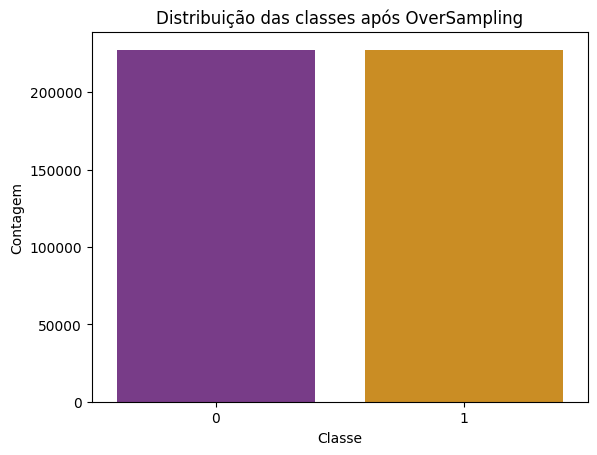

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Suponha que você já tenha o DataFrame 'df' carregado com os dados do arquivo 'creditcard.csv'

# Separar as features (X) e o rótulo (y) do DataFrame
X = df.drop(['Class'], axis=1).values
y = df['Class'].values

# Dividir os dados em conjunto de treinamento e conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

# Exibir informações sobre as formas dos conjuntos de treinamento e validação
print("Número de transações no conjunto de treinamento X_train:", X_train.shape)
print("Número de transações no conjunto de treinamento y_train:", y_train.shape)
print("Número de transações no conjunto de validação X_val:", X_val.shape)
print("Número de transações no conjunto de validação y_val:", y_val.shape)

# Exibir contagens das classes antes do OverSampling
print("Antes do OverSampling, contagem da classe '1': {}".format(sum(y_val == 1)))
print("Antes do OverSampling, contagem da classe '0': {}".format(sum(y_val == 0)))

# Aplicar SMOTE para fazer OverSampling no conjunto de treinamento
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

# Exibir informações sobre as formas dos conjuntos de treinamento e validação após o OverSampling
print("Após o OverSampling, forma do conjunto de treinamento X_train_s:", X_train_s.shape)
print("Após o OverSampling, forma do conjunto de treinamento y_train_s:", y_train_s.shape)

# Exibir contagens das classes após o OverSampling
percentage_of_ones = sum(y_train_s == 1) / len(y_train_s) * 100.0
percentage_of_zeros = sum(y_train_s == 0) / len(y_train_s) * 100.0
print("Após o OverSampling, contagem da classe '1': {:.2f}%".format(percentage_of_ones))
print("Após o OverSampling, contagem da classe '0': {:.2f}%".format(percentage_of_zeros))

# Plotar o gráfico com a distribuição das classes após o OverSampling
sns.countplot(x=y_train_s, palette='CMRmap')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição das classes após OverSampling')
plt.show()


In [ ]:

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_s, y_train_s)
predictions = random_forest.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_val, predictions)
print("Acurácia do Random Forest após SMOTE:", accuracy)

print("Relatório de Classificação:")
print(classification_report(y_val, predictions))

print("Matriz de Confusão:")

conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

# Treinar o modelo Isolation Forest com o conjunto de treinamento aumentado
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train_s)

# Identificar as anomalias no conjunto de dados
df['anomaly'] = isolation_forest.predict(X_val)

# Transformar os resultados em 0 e 1 (0 = não anomalia, 1 = anomalia)
#df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

anomalies = np.where(anomalies == -1, 1, 0)

# Avaliar as anomalias encontradas
print("Quantidade de anomalias detectadas:", np.sum(anomalies))
print("Quantidade de observações no conjunto de dados:", len(anomalies))

# Visualizar a distribuição das anomalias
sns.countplot(x=anomalies, data=df, palette='coolwarm')
plt.xlabel('Anomalia')
plt.ylabel('Contagem')
plt.title('Isolation Forest - Anomaly Detection')
plt.show()

ValueError: ignored

In [ ]:
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1).values
y = df['Class'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

# Apply SMOTE to the training set for dealing with imbalanced data
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

# Perform feature selection on the training set using SelectKBest
k = 10  # Set the desired number of features to keep
selector = SelectKBest(score_func=lambda X, y: -lasso_model.coef_)
X_top_k = selector.fit_transform(X_scaled, y)

# Get the indices of the top k features
top_k_indices = selector.get_support(indices=True)

# Get the names of the top k features
top_k_features = X.columns[top_k_indices]

# Create a new DataFrame with only the top k features and the target variable
df_top_k_features = pd.concat([X[top_k_features], y], axis=1)
X_train_s_reduced = selector.fit_transform(X_train_s, y_train_s)

# Train the Random Forest model on the reduced feature set
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_s_reduced, y_train_s)
X_val_reduced = selector.transform(X_val)
predictions = random_forest.predict(X_val_reduced)

accuracy = accuracy_score(y_val, predictions)
classification_report_str = classification_report(y_val, predictions)

# Calculate and save the confusion matrix
conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.title('Confusion Matrix')
plt.savefig("conf_matrix.png")
plt.close()

# Calculate and save the precision-recall curve
y_pred_prob = random_forest.predict_proba(X_val_reduced)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig("precision_recall_curve.png")
plt.close()

# Print the file paths of the saved images
print("conf_matrix.png")
print("precision_recall_curve.png")

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)


NameError: ignored

IMPORTANTE


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your dataset in a DataFrame called df
# And your target variable is in a Series called 'Class'

X = df.drop(['Class'], axis=1).values
y = df['Class'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=50)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set for dealing with imbalanced data
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())


Acurácia do Random Forest após SMOTE: 0.9993328827365853
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227454
           1       0.81      0.81      0.81       392

    accuracy                           1.00    227846
   macro avg       0.90      0.90      0.90    227846
weighted avg       1.00      1.00      1.00    227846

Matriz de Confusão:


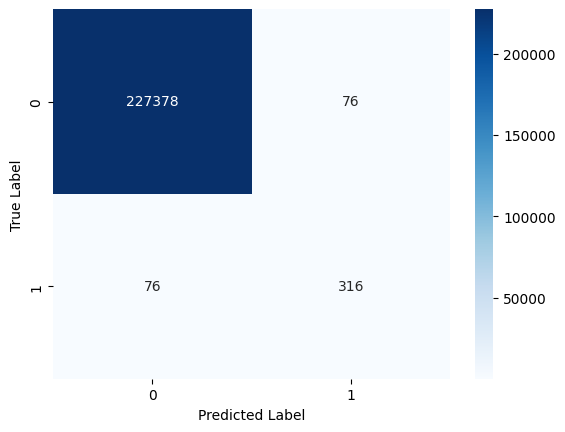

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_s, y_train_s)
predictions = random_forest.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_val, predictions)
print("Acurácia do Random Forest após SMOTE:", accuracy)

print("Relatório de Classificação:")
print(classification_report(y_val, predictions))

print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection on the training set using SelectKBest with f_classif score function
k = 19  # Set the desired number of features to keep
selector = SelectKBest(score_func=f_classif, k=k)
X_train_s_reduced = selector.fit_transform(X_train_s, y_train_s)

# Get the indices of the top k features
top_k_indices = selector.get_support(indices=True)

# Get the names of the top k features
top_k_features = df.columns[top_k_indices]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

# Train the Random Forest model on the reduced feature set
random_forest = RandomForestClassifier(n_estimators=45, random_state=42)
random_forest.fit(X_train_s_reduced, y_train_s)
feature_importances = random_forest.feature_importances_
# Apply the same feature selection to the validation set
X_val_reduced = selector.transform(X_val)

# Make predictions on the reduced validation set
predictions = random_forest.predict(X_val_reduced)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_val, predictions)
classification_report_str = classification_report(y_val, predictions)


0.9993241048778561


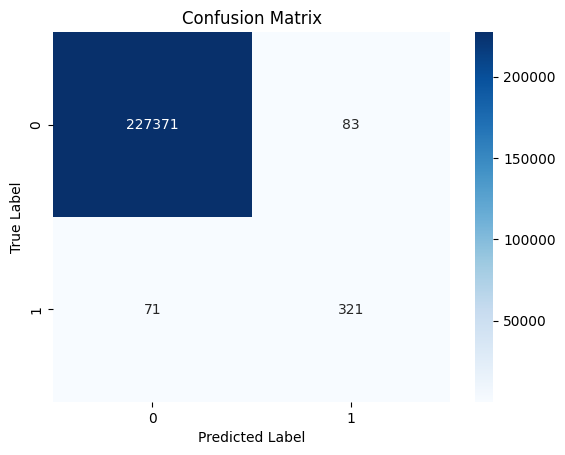

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(accuracy)
# Calculate and save the confusion matrix
conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
tree_predictions = random_forest.estimators_[0].predict(X_val_reduced)
tree_conf_matrix = confusion_matrix(y_val, tree_predictions)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



0.9995435553526912


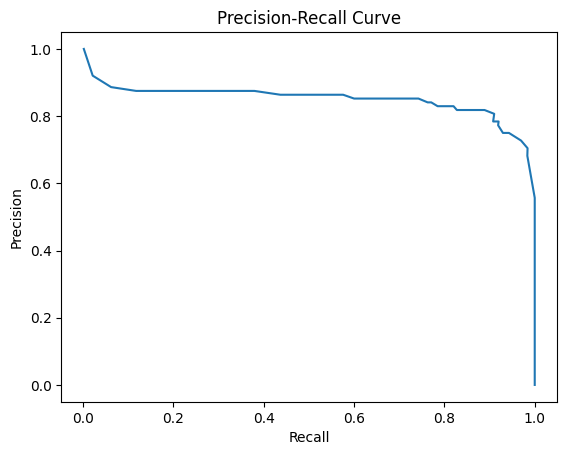

In [ ]:
# Calculate and save the precision-recall curve
y_pred_prob = random_forest.predict_proba(X_val_reduced)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)
print(accuracy)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# @title Texto de título padrão
show_tree(random_forest.estimators_[0], pd.DataFrame(X_train_s_reduced, columns=selector.get_support(indices=True)), y_train_s)

Accuracy: 0.9993


In [ ]:
# Create a DataFrame with the reduced features and the target variable
df_reduced_features = pd.DataFrame(X_train_s_reduced, columns=top_k_features)
df_reduced_features['Class'] = y_train_s

# Display the DataFrame with reduced features
df_reduced_features


Time         V1        V2         V3        V4         V5  \
0        51144.000000   1.086580  0.050038   0.480589  1.345996  -0.301945   
1        77896.000000   1.170976 -0.233322   0.805117  0.003894  -0.843679   
2       108764.000000  -2.117320  3.122077  -2.601091  0.115248  -0.691650   
3        36855.000000   0.258710 -1.315833   0.404775  1.118264  -0.283324   
4        47143.000000   0.562285 -0.315145  -0.600963 -1.457950   1.484543   
...               ...        ...       ...        ...       ...        ...   
454877  142487.971142  -0.938985  1.620519  -2.683292  2.590866   3.398408   
454878   93873.157835 -12.223786  7.268546 -19.344622  7.760979 -11.168625   
454879    8763.567294  -1.645248  4.753118  -7.002068  5.750748  -0.839857   
454880   47881.528032  -0.422291 -0.257573   0.122594  1.225924   0.112482   
454881   35867.283582  -2.091806  3.393097  -3.927199  5.619351  -3.110623   

              V6         V7        V9        V10       V11        V12  \
0      -0.002347  -0.090502  0.183144   0.071578  1.157259   0.700570   
1      -0.240627  -0.610542  0.335269   0.012814  1.617416   0.421864   
2       1.780926  -6.114781 -0.097354  -3.690974 -0.800057  -1.426279   
3       1.881561  -0.298830  0.148387  -0.210689  2.124923   1.035106   
4       3.808075  -1.089625 -1.059248   0.553510 -0.349757  -0.649369   
...          ...        ...       ...        ...       ...        ...   
454877 -2.696111  -4.944043 -1.202630  -2.498931  0.611223  -2.769611   
454878 -4.849251 -14.037943 -4.136474 -15.464220  7.739928 -15.736220   
454879 -2.822088  -3.630802 -2.813413  -6.602677  6.890863  -9.456795   
454880 -0.661769   0.451214 -0.012461  -0.258636  0.933218   0.073425   
454881 -1.242322  -5.806899 -4.473916  -6.083151  3.830110  -8.270282   

              V14        V16        V17       V18       V19       V20  \
0        0.496591  -0.533692   0.150805 -0.412737 -0.151191 -0.235984   
1        0.483574   0.407851  -0.276172 -0.012717 -0.334201 -0.163107   
2        4.592525   0.482536   1.420560 -0.248549 -1.489634  3.425980   
3        0.553171  -0.578716   0.387816 -1.038754 -1.978282  0.471099   
4       -0.137873   0.434509   0.611648 -1.152464  2.174125  0.207288   
...           ...        ...        ...       ...       ...       ...   
454877  -3.636834  -2.445949  -2.530674 -1.314201  0.064483  0.431823   
454878 -13.772174 -10.811055 -15.873092 -5.841092  2.359725 -1.153814   
454879  -9.647678  -3.121744  -3.923771 -0.253609 -0.190396  0.448308   
454880  -0.674150  -0.017754   0.814210  0.170492  0.260501 -0.616208   
454881  -8.404948  -7.847683 -14.563096 -5.175201  2.415977  1.105183   

             V21  Class  
0      -0.043015      0  
1       0.155668      0  
2      -7.643036      0  
3       0.562493      0  
4       0.783822      0  
...          ...    ...  
454877 -0.680810      1  
454878  2.836099      1  
454879  0.741732      1  
454880 -0.195367      1  
454881  1.486770      1  

[454882 rows x 20 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set for dealing with imbalanced data
sm = SMOTE(random_state=2)
X_s, y_s = sm.fit_resample(X_train, y_train.ravel())

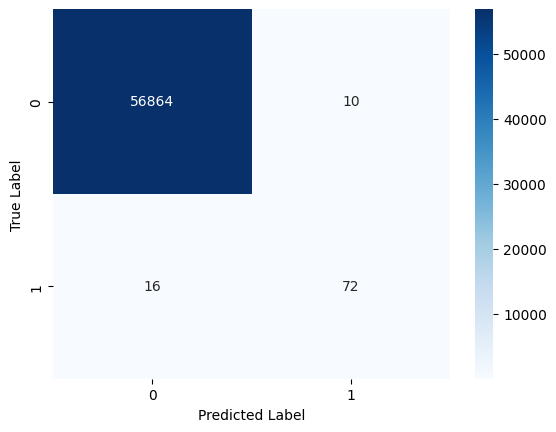

NameError: ignored

In [ ]:


conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
df_top_10_features

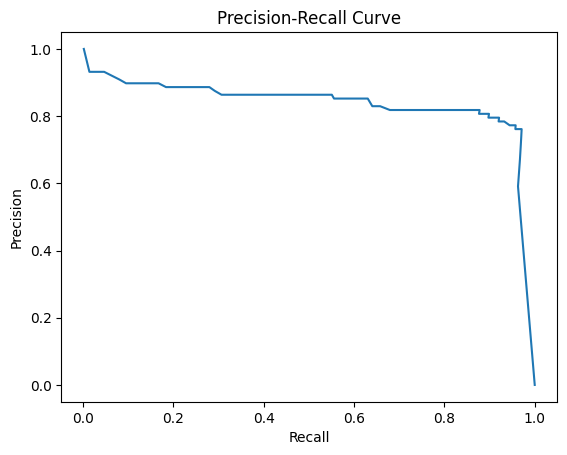

In [ ]:
y_pred_prob = random_forest.predict_proba(X_val_reduced)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig("precision_recall_curve.png")

In [ ]:
def show_tree(model, X, y):
    class_names = ['0', '1']
    feature_names = X.columns.tolist()

    graph_data = export_graphviz(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    print('Accuracy: %.4f' % accuracy)
    graph = Source(graph_data)
    return SVG(graph.pipe(format='svg'))

In [ ]:
from sklearn.tree  import export_graphviz
from  graphviz import Source
from IPython.display import display , SVG


models = random_forest.estimators_
max_nodes = 1E100
model_selected = None

for model in models:
    M = model.tree_.node_count
    if M < max_nodes :
         max_nodes = M
         model_selected = model

X_reduced = df_reduced_features.drop(['Class'], axis=1)
y_reduced = df_reduced_features['Class']

# Call the show_tree function to visualize the decision tree
show_tree(model_selected, X_reduced, y_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9993


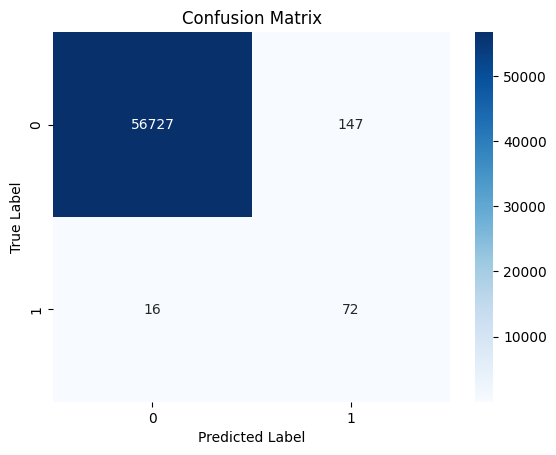

In [ ]:
y_pred = model_selected.predict(X_val_reduced)

# Calcule a matriz de confusão
conf_matrix = confusion_matrix(y_val, y_pred)

# Crie um heatmap para visualizar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Acurácia do Random Forest: 0.9970506653558513
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.32      0.78      0.45        88

    accuracy                           1.00     56962
   macro avg       0.66      0.89      0.72     56962
weighted avg       1.00      1.00      1.00     56962



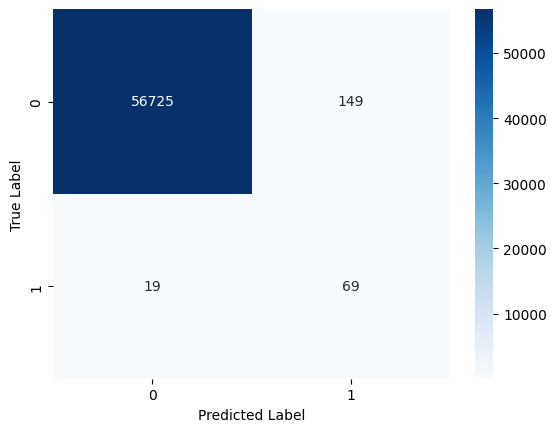

In [ ]:
predictions = model_selected.predict(X_val)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_val, predictions)
print("Acurácia do Random Forest:", accuracy)

# Exibir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_val, predictions))

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

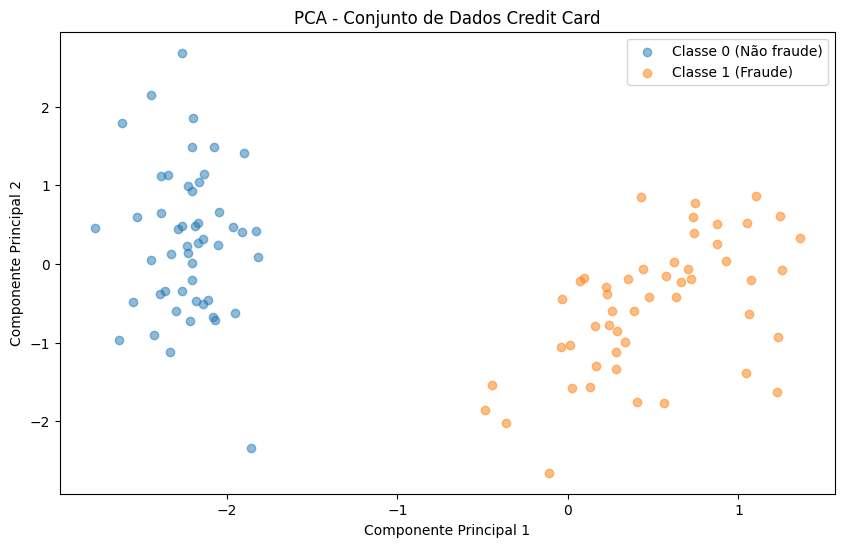

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separar as features (atributos) do alvo (classe)
#X = df.drop('Class', axis=1)
#y = df['Class']

# Pré-processar os dados normalizando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o PCA para redução de dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame para visualização
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Class'] = y

# Visualizar os dados reduzidos em um gráfico bidimensional
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[df_pca['Class'] == 0]['Componente 1'], df_pca[df_pca['Class'] == 0]['Componente 2'], label='Classe 0 (Não fraude)', alpha=0.5)
plt.scatter(df_pca[df_pca['Class'] == 1]['Componente 1'], df_pca[df_pca['Class'] == 1]['Componente 2'], label='Classe 1 (Fraude)', alpha=0.5)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Conjunto de Dados Credit Card')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o PCA para redução de dimensionalidade, mantendo apenas as 2 primeiras componentes principais
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com as duas primeiras componentes principais e a classe alvo
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2','Componente 3', 'Componente 4'])
df_pca['Class'] = y

# Visualizar o DataFrame resultante com as duas primeiras componentes principais e a classe alvo

df_pca.head()


Componente 1  Componente 2  Componente 3  Componente 4  Class
0     -0.030674     -0.123751      0.612510     -1.325658      0
1     -0.721803     -0.890755     -0.264613     -1.218104      0
2     -0.025794     -0.236990     -0.351074     -1.383916      0
3     -0.161763      0.376305     -0.699615     -1.345959      0
4      0.297539      0.359468      0.551349     -1.398909      0

In [ ]:
df_pca['Class'].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

Número da transação conjunto de dados x_train:  (120, 4)
Número da transação conjunto de dados y_train:  (120,)
Número da transação conjunto de dados x_val:  (30, 4)
Número da transação conjunto de dados y_val:  (30,)
Antes do OverSampling, contagens do rótulo '1': 12
Antes do OverSampling, contagens do rótulo '0': 9 

Depois do OverSampling, a forma do train_x: (123, 4)
Depois do OverSampling, a forma do train_y: (123,) 

Depois do OverSampling, contagens do rótulo '1', %: 33.33333333333333
Depois do OverSampling, contagens do rótulo '0', %: 33.33333333333333


<Axes: ylabel='count'>

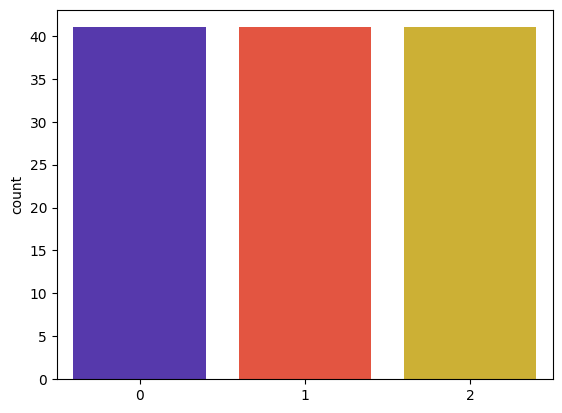

In [ ]:
from imblearn.over_sampling import SMOTE

X = df_pca.drop(['Class'], axis=1).values
y = df_pca['Class'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

print("Número da transação conjunto de dados x_train: ", X_train.shape)
print("Número da transação conjunto de dados y_train: ", y_train.shape)
print("Número da transação conjunto de dados x_val: ", X_val.shape)
print("Número da transação conjunto de dados y_val: ", y_val.shape)

print("Antes do OverSampling, contagens do rótulo '1': {}".format(sum(y_val==1)))
print("Antes do OverSampling, contagens do rótulo '0': {} \n".format(sum(y_val==0)))

sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('Depois do OverSampling, a forma do train_x: {}'.format(X_train_s.shape))
print('Depois do OverSampling, a forma do train_y: {} \n'.format(y_train_s.shape))

print("Depois do OverSampling, contagens do rótulo '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("Depois do OverSampling, contagens do rótulo '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df_pca, palette='CMRmap')

Acurácia do Random Forest após SMOTE: 0.9
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.75      0.86        12
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Matriz de Confusão:


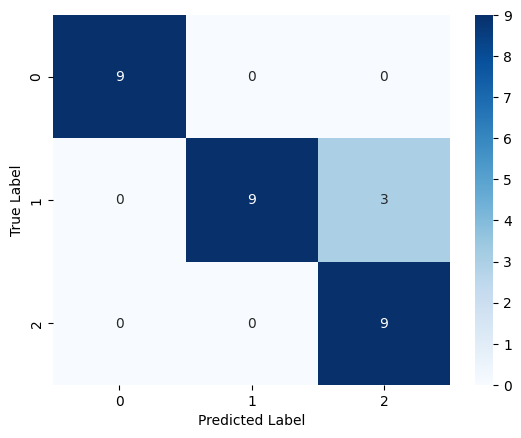

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=250, random_state=42)
random_forest.fit(X_train_s, y_train_s)
predictions = random_forest.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_val, predictions)
print("Acurácia do Random Forest após SMOTE:", accuracy)

print("Relatório de Classificação:")
print(classification_report(y_val, predictions))

print("Matriz de Confusão:")

conf_matrix = confusion_matrix(y_val, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from collections import Counter #para contagem de frequências
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=284807, #Número de objetos da base de dados (linhas)
                           n_features=31,  #Número de atributos (colunas)
                           n_informative=31, #Quantidade de atributos relevantes
                           n_redundant=0, #Quantidade de atributos irrelevantes (muito parecidos)
                           n_repeated=0, #Qtd de atributos repetidos
                           n_classes=2, #Qtd de classes
                           n_clusters_per_class=1, #Distribuições por classe
                           weights=[0.95, 0.05], #proporção de objetos por classe
                           class_sep=0.8, random_state=0)
print('Dados: ',x)
freq_class = sorted(Counter(y).items())
print('Rótulos: ',y,freq_class)

Dados:  [[-2.67398917  2.96361923 -1.95584597 ...  0.63236662  1.79085866
   3.56130374]
 [-0.77722734  0.24269185  3.09142818 ... -6.33509263 -3.49444797
   0.08838056]
 [ 4.2475084  -0.15956185  1.59567644 ...  0.42328457 -0.56811957
   0.52884734]
 ...
 [ 1.94057602  0.65731382  0.17358422 ... -4.9530193  -4.23883938
  -3.2077761 ]
 [-2.49577486 -1.63899116 -1.43622715 ...  3.72885126  7.05109319
   1.36375673]
 [ 5.18321362  1.08259699 -1.51310824 ...  0.24100867 -1.63202832
   0.30604083]]
Rótulos:  [0 0 0 ... 0 0 0] [(0, 269260), (1, 15547)]


# **Undersample**

In [ ]:
#importando a bilbioteca de amostragem UnderSampling
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42,sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
freq_class = sorted(Counter(y).items())
freq_classU = sorted(Counter(y_under).items())
print(freq_class)
print(freq_classU)

[(0, 269260), (1, 15547)]
[(0, 15547), (1, 15547)]


# **Oversample**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42,sampling_strategy='minority')
x_over, y_over = ros.fit_resample(x, y)
freq_classO = sorted(Counter(y_over).items())
print(freq_class)
print(freq_classO)

[(0, 269260), (1, 15547)]
[(0, 269260), (1, 269260)]


# **Smote**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42,sampling_strategy='minority')
x_smote, y_smote = sm.fit_resample(x, y)
freq_classS = sorted(Counter(y_smote).items())
print(freq_class)
print(freq_classS)

[(0, 269260), (1, 15547)]
[(0, 269260), (1, 269260)]


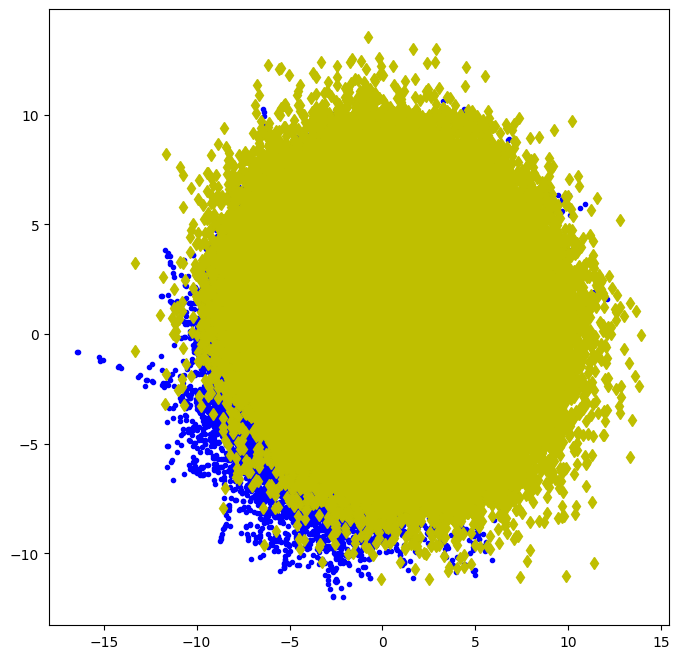

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(x_smote[y_smote==0,0], x_smote[y_smote==0,1],'.r')
plt.plot(x_smote[y_smote==1,0], x_smote[y_smote==1,1],'.b')
plt.plot(x[y==0,0], x[y==0,1],'dy')
plt.show()

# **Algoritimo de Visualização 3NN (Validação Cruzada)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import classification_report

y_names = ["Fraudulenta", "Normal"]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_smote, y_smote)

# 1. Validação Cruzada
cross_val_scores = cross_val_score(knn, x, y, cv=5)
print("Resultados da Validação Cruzada:")
print(cross_val_scores)
print("Precisão Média:", cross_val_scores.mean())

y_pred = cross_val_predict(knn, x, y, cv=5)

report = classification_report(y, y_pred , target_names=y_names)
print("Relatório de Classificação:")
print(report)

Resultados da Validação Cruzada:
[0.990362   0.99044977 0.99011604 0.99062516 0.99048472]
Precisão Média: 0.9904075391521593
Relatório de Classificação:
              precision    recall  f1-score   support

 Fraudulenta       0.99      1.00      0.99    269260
      Normal       0.99      0.83      0.90     15547

    accuracy                           0.99    284807
   macro avg       0.99      0.92      0.95    284807
weighted avg       0.99      0.99      0.99    284807

